# Proyek Analisis Data: Air Quality
- **Nama:** Muhammad Dicry Sirot Nur Fahmi
- **Email:** dicryfahmy@gmail.com  
- **ID Dicoding:** fahmi1112

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
    Pengrauh gas SO2 dan NO2 terhadap curah hujan
- Pertanyaan 2
    Pengaruh gas PM2.5 dan PM10 terhadap temperatur
- Pertanyaan 3
    Bagaimana tren curah hujan setiap bulannya

## Import Semua Packages/Library yang Digunakan

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [189]:
air_quality = pd.read_csv('..\\Dashboard\\PRSA_Data_Changping_20130301-20170228.csv')
air_quality.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Insight:**
- mengambil data kualitas udara di Wanliu

### Assessing Data

In [190]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [191]:
air_quality.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [192]:
print("Jumlah duplikasi: ", air_quality.duplicated().sum())

Jumlah duplikasi:  0


In [193]:
air_quality.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


**Insight:**
- ditemukan missing value pada data

### Cleaning Data

In [194]:
air_quality.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [ ]:
air_quality = air_quality.interpolate(method='linear', limit_direction='forward')

**Insight:**
- menggunakan metode interpolate untuk mengisi missing value

## Exploratory Data Analysis (EDA)

### Explore air_quality

In [196]:
air_quality = air_quality[['hour','day','month','year','PM2.5','PM10','SO2','NO2','RAIN','TEMP']]
air_quality

,hour,day,month,year,PM2.5,PM10,SO2,NO2,RAIN,TEMP
0,0,1,3,2013,3.0,6.0,13.0,7.0,0.0,-2.3
1,1,1,3,2013,3.0,3.0,6.0,6.0,0.0,-2.5
2,2,1,3,2013,3.0,3.0,22.0,13.0,0.0,-3.0
3,3,1,3,2013,3.0,6.0,12.0,8.0,0.0,-3.6
4,4,1,3,2013,3.0,3.0,14.0,8.0,0.0,-3.5
...,...,...,...,...,...,...,...,...,...,...
35059,19,28,2,2017,28.0,47.0,4.0,14.0,0.0,11.7
35060,20,28,2,2017,12.0,12.0,3.0,23.0,0.0,10.9
35061,21,28,2,2017,7.0,23.0,5.0,17.0,0.0,9.5
35062,22,28,2,2017,11.0,20.0,3.0,15.0,0.0,7.8


**Insight:**
- memilah data yang diperlukan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh SO2 dan NO2 terhadap hujan

In [197]:
rain_corr = air_quality[['RAIN','SO2','NO2']].corr()
rain_corr

,RAIN,SO2,NO2
RAIN,1.000000,-0.038461,-0.043648
SO2,-0.038461,1.000000,0.493051
NO2,-0.043648,0.493051,1.000000


<Axes: >

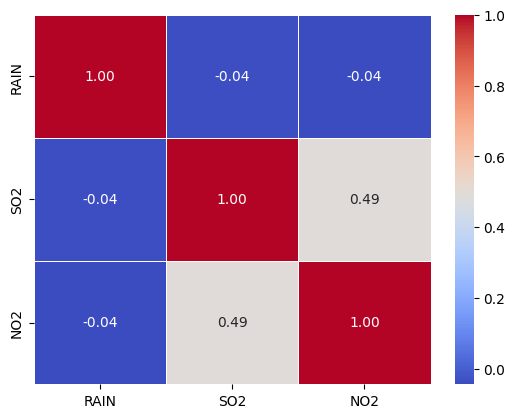

In [198]:
sns.heatmap(rain_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

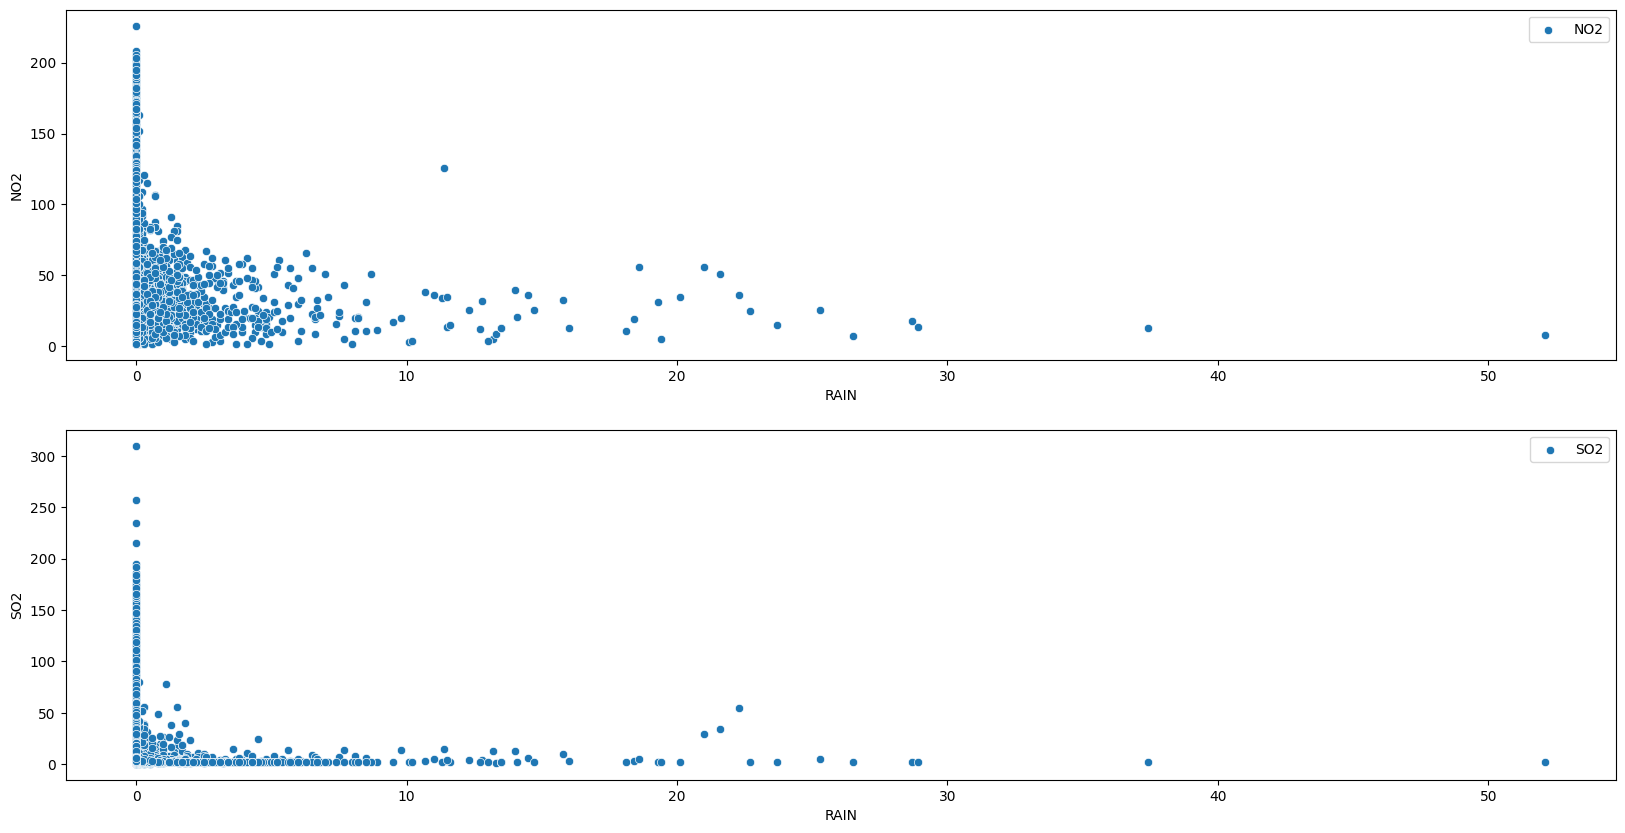

In [199]:
fig,axs = plt.subplots(2,1,figsize=(20,10))
sns.scatterplot(ax=axs[0],x='RAIN', y='NO2', data = air_quality,label='NO2')
sns.scatterplot(ax=axs[1],x='RAIN', y='SO2', data = air_quality,label='SO2')
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana pengaruh gas PM2.5 dan PM10 terhadap suhu

In [200]:
temp_corr = air_quality[['TEMP','PM2.5','PM10']].corr()
temp_corr

,TEMP,PM2.5,PM10
TEMP,1.000000,-0.113130,-0.091554
PM2.5,-0.113130,1.000000,0.859519
PM10,-0.091554,0.859519,1.000000


<Axes: >

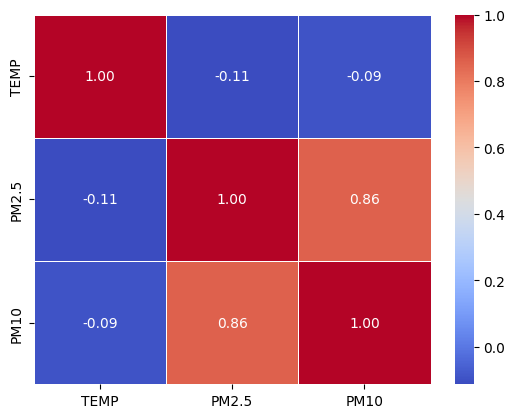

In [201]:
sns.heatmap(temp_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

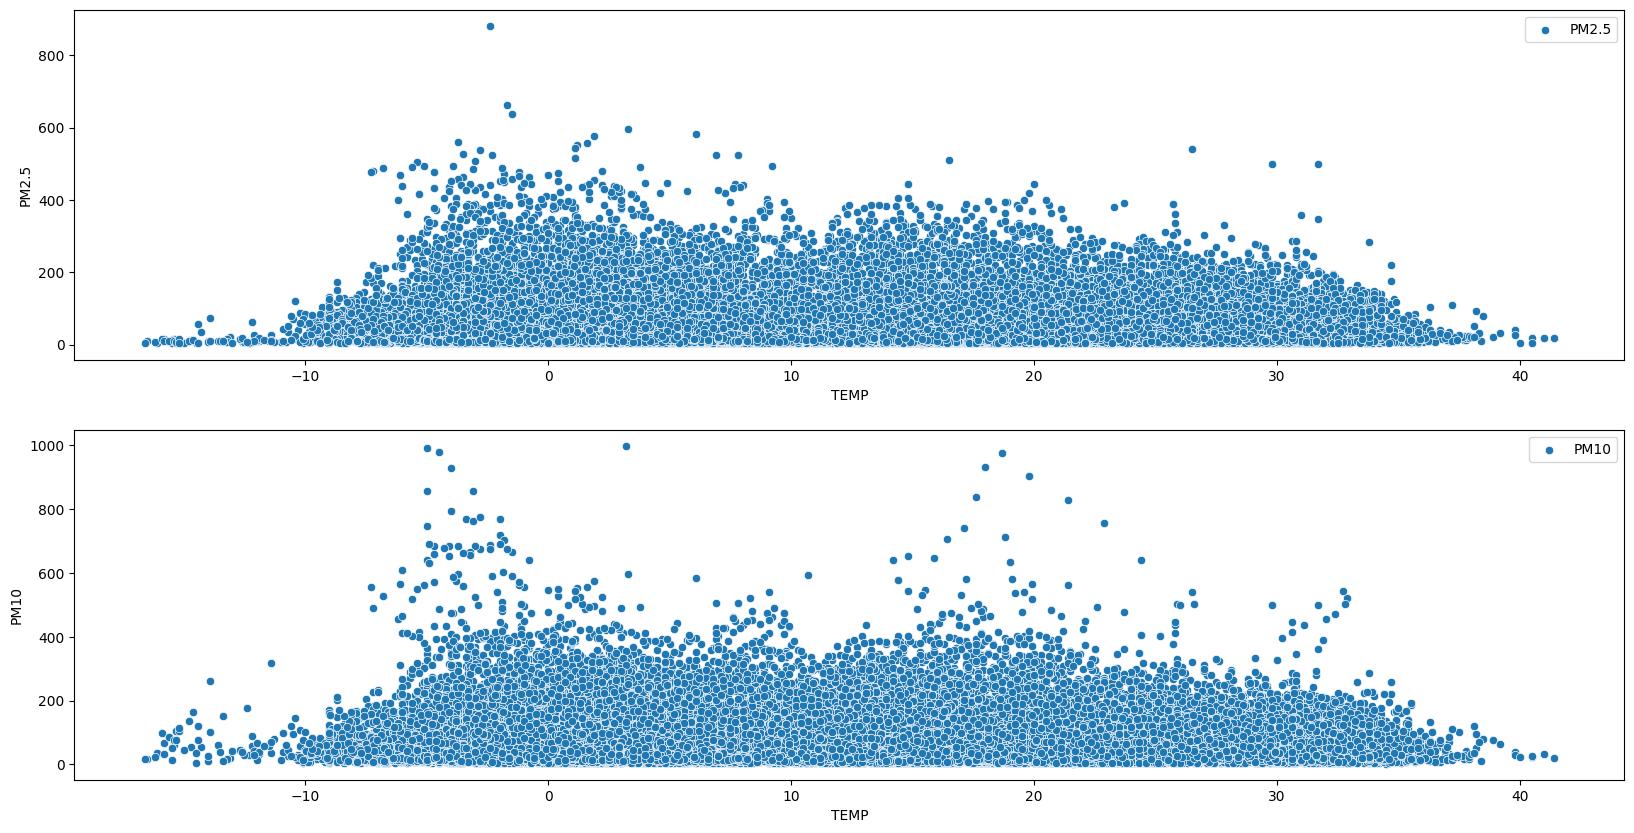

In [202]:
fig,axs = plt.subplots(2,1,figsize=(20,10))
sns.scatterplot(ax=axs[0],x='TEMP', y='PM2.5', data = air_quality,label='PM2.5')
sns.scatterplot(ax=axs[1],x='TEMP', y='PM10', data = air_quality,label='PM10')
plt.legend()
plt.show()

### Pertanyaan 3: Bagaimana tren curah hujan pada tiap bulannya

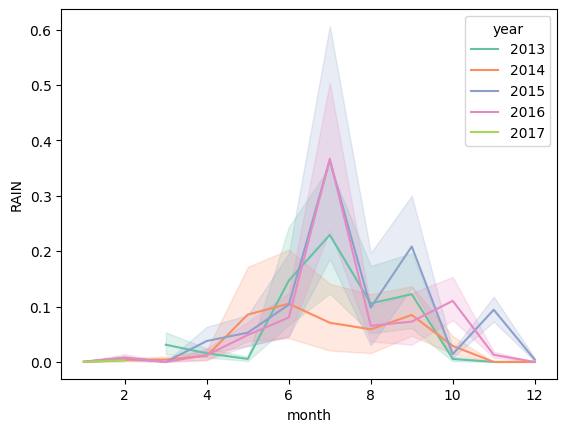

In [203]:
sns.lineplot(x=air_quality['month'], y=air_quality['RAIN'], hue=air_quality['year'], palette='Set2')
plt.show()

**Insight:**
- nilai korelasi antara gas SO2 dan NO2 terhadap hujan mendekati 0
- nilai korelasi antara gas PM2.5 dan PM10 terhadap temperatur mendekati 0
- curah hujan tertinggi terjadi pada tahun 2016

## Conclusion

- Conclution pertanyaan 1
    
    Tidak ada korelasi antara gas SO2 dan NO2 terhadap hujan
- Conclution pertanyaan 2

    Tidak ada korelasi antara gas PM2.5 dan PM 10 terhadap Temperatur
- Conclution pretanyaan 3

    Curah hujan tertinggi terjadi pada bulan 7 tahun 2016

In [204]:
air_quality.to_csv("air_quality.csv", index=False)